# Rendőrségi rajz
A  környéken megnőtt a betörések száma, de az elkövető nem hagyott maga után semmilyen bizonyítékot, ujjlenyomatot ami alapján meg lehetne találni.

Tegnap azonban jelentkezett egy szemtanú, akinek az elmondása alapján kollegád rendőrségi rajzot készített. Keresd meg, hogy a környéken lakó bűnözők közül kire hasonlít leginkább a rajz! (face_recognition.api.face_distance())

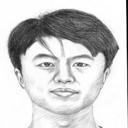


A válasz a bűnöző neve, azaz a fájlnév (kiterjesztés nélkül)


Fájlok: a rendőrségi rajz (police_sketch.jpg), fotók a környéken lakó bűnözőkről, egy betanított tf keras háló (sketch_to_photo.h5), ami rendőrségi rajzból fotót generál (sketch.zip)

A face_recognition csomag installálásához szükség van GPUra (colab Change runtime type to GPU)!


In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b46a66727f84940fc73d9b82ab31079b4b6cadb378123b6ef78262c34ce24c3b
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import face_recognition

In [3]:

!gdown 1SO-LODA4pQPiaxKVFKkkpqYkzRxxDm6Q
!unzip sketch.zip

Downloading...
From: https://drive.google.com/uc?id=1SO-LODA4pQPiaxKVFKkkpqYkzRxxDm6Q
To: /content/sketch.zip
100% 15.9M/15.9M [00:00<00:00, 92.3MB/s]
Archive:  sketch.zip
   creating: criminals_nearby/
  inflating: criminals_nearby/Rachel_Pena.jpg  
  inflating: criminals_nearby/Dale_Carter.jpg  
  inflating: criminals_nearby/Girolamo_Sbarbaro.jpg  
  inflating: criminals_nearby/Kelly_Bates.jpg  
  inflating: criminals_nearby/Charles_Kelly.jpg  
  inflating: criminals_nearby/Erica_Nielsen_MD.jpg  
  inflating: criminals_nearby/Lara_Gentileschi.jpg  
  inflating: criminals_nearby/Mario_Marino-Cociarelli.jpg  
  inflating: criminals_nearby/Donatella_Sauli-Druso.jpg  
  inflating: criminals_nearby/Mark_Johnson.jpg  
  inflating: criminals_nearby/Carrie_Quinn.jpg  
  inflating: criminals_nearby/Brianna_Conner.jpg  
  inflating: criminals_nearby/Willie_Hill.jpg  
  inflating: criminals_nearby/Teresa_Bevilacqua.jpg  
  inflating: criminals_nearby/Berenice_Esposito.jpg  
  inflating: crimina

In [4]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob

# Load the trained model
model = tf.keras.models.load_model('sketch_to_photo.h5')

# Load the sketch
sketch = Image.open('police_sketch.jpg')
sketch = np.array(sketch.resize((128, 128))) / 255.0

# Use the model to generate a photo from the sketch
generated_photo = model.predict(sketch[np.newaxis, ...])[0]
generated_photo_rescaled = (generated_photo * 255).astype('uint8')

# If the generated photo is grayscale and you want to convert it to RGB
if len(generated_photo_rescaled.shape) == 2:
    # Convert grayscale image to RGB
    generated_photo_rgb = np.stack([generated_photo_rescaled]*3, axis=-1)
else:
  generated_photo_rgb = generated_photo_rescaled

# Load the photos of the criminals
criminal_photos = []
criminal_names = []
for filename in glob.glob('criminals_nearby/*.jpg'):
    if filename != 'police_sketch.jpg':
        image = face_recognition.load_image_file(filename, 'RGB')
        criminal_photos.append(image)
        criminal_names.append(filename[:-4])  # remove the .jpg extension

# Calculate face encodings for the generated photo and the criminal photos
generated_photo_encoding = face_recognition.face_encodings(generated_photo_rgb)[0]
criminal_photo_encodings = [face_recognition.face_encodings(photo)[0] for photo in criminal_photos]

# Calculate the face distance between the generated photo and the criminal photos
face_distances = face_recognition.face_distance(criminal_photo_encodings, generated_photo_encoding)

# Find the criminal with the smallest face distance
best_match_index = np.argmin(face_distances)
best_match_name = criminal_names[best_match_index]

print(f"The sketch most closely resembles the criminal: {best_match_name}")


1/1 [==============================] - 8s 8s/step
The sketch most closely resembles the criminal: criminals_nearby/Zachary_Davis


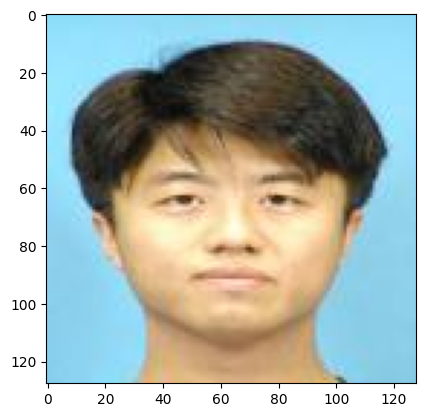

In [5]:
import matplotlib.pyplot as plt

# Load the image
img = Image.open('criminals_nearby/Zachary_Davis.jpg')

# Display the image
plt.imshow(img)
plt.show()
